# **SYRIATEL CUSTOMER CHURN**

## INTRODUCTION

**NAME**;   Aggrey Musonye Timbwa

**DATA BEING ANALYSING**;  SyriaTel Customer Churn

**PROJECT PERIOD**; 22/08/2024 to 30/08/2024

**STUDENT PACE**; part_time classes

## BUSINESS UNDERSTANDING

**INTRODUCTION**

SyriaTel, like many telecommunications companies, faces the challenge of customers stop using their services because of one reason or another. This not only leads to a direct loss in revenue but also incurs additional costs related to acquiring new customers to replace those who have left through advertsing and marketing. The goal of this project is to predicts whether a customer is likely to stop doing business with SyriaTel in the near future. By identifying patterns and factors that contribute to customer stop using their services, the company can take proactive measures to retain at-risk customers and at the same same time gain new ones.
Ultimately, this project should help SyriaTel not only retain more customers but also optimize its marketing and customer service efforts, leading to improved customer satisfaction and sustained revenue growth.

**PROBLEM STATEMENT**

SyriaTel faces significant revenue losses when customers discontinue their services. To address this, we need to develop a binary classification model to predict whether a customer is likely to stop using SyriaTel’s services soon. By analyzing customer data, such as usage patterns and service interactions, this model will identify at-risk customers. Understanding these predictive patterns will allow SyriaTel to implement targeted retention strategies, reducing churn and associated revenue loss. This approach aims to enhance customer retention and improve overall financial performance.

**OBJECTIVES**

1. To develop a predictive model
2. understand the key features in the data set
3. Evaluate the model
4. Aid in decision making 

**DATA DESCRIPTION**

The data set is named sim_usage.csv and contains the following sections; 


**METHODOLOGY**

This project will follow the following steps
1. Data understanding ; reading the data and inspecting it
2. Data preparation; involves cleaning and handling outlier
3. Modelling; bulding predictive models
4. Evaluation ; assesing the model performance

## Understanding the data

In [22]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier


In [23]:
# Loading the data
df = pd.read_csv("sim_usage.csv")

In [24]:
# Data inspection
print(df.shape)

(3333, 21)


The data set has 3333 rows and 21 collumns 

In [25]:
# viewing the first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [26]:
# viewing the last five rows
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


From the observation of the above we can already see that the data set is of different types

In [27]:
# Viewing the different data types available
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The distribution of the data types is as follows; There is one boolean data type, 8 float64 data types. 8 integer data type and 4 object data types

In [28]:
# Checking for null values;
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no null values in the data set

In [29]:
# Checking for duplicates
df.duplicated().sum()

0

There are no duplicates

In [30]:
# Summary statistics for numerical columns
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In describing the data we are intrested with the following data; number vmail messages,	total day minutes,	total day, calls	total day charge,	total eve minutes,	total eve calls	total eve charge,	total night minutes	total night, calls,	total night charge,	total intl minutes,	total intl calls,	total intl charge and	customer service calls


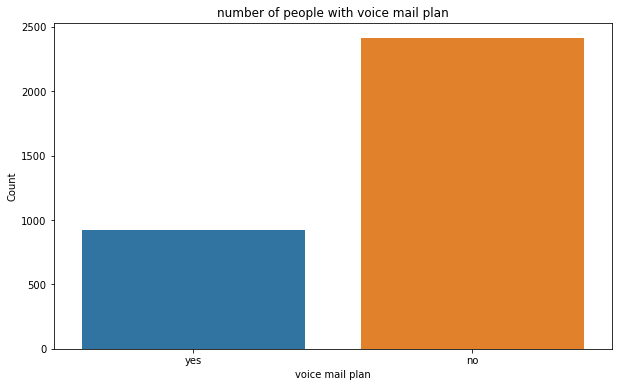

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x= "voice mail plan", data=df)
plt.title("number of people with voice mail plan")
plt.xlabel("voice mail plan")
plt.ylabel('Count')
plt.show()

Many people do not have a voice mail plan as compared to those that have

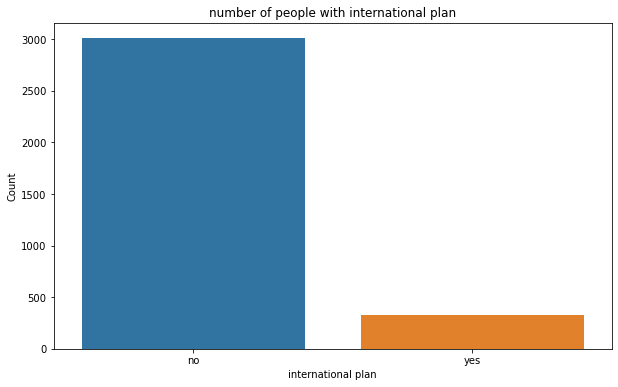

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x= "international plan", data=df)
plt.title("number of people with international plan")
plt.xlabel("international plan")
plt.ylabel('Count')
plt.show()

Most people do not have the international plan

Generally from the two plots above it can already be seen that the SyriaTel services are not being utilized by most of its customers

In [45]:
# train_test splitiing the data
y = df["churn"]
X = df.drop(columns=["churn","area code", "phone number"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=42)

In [48]:
# preprocessing the data using one hot encoder
ohe = OneHotEncoder()
ohe.fit(X_train)
X_train_scaled = ohe.transform(X_train)
